In [1]:
import xgboost as xgb

/home/cic/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from xgboost.sklearn import XGBClassifier

In [3]:
import numpy as np

from sklearn.datasets import load_svmlight_files
from sklearn.metrics import accuracy_score

In [4]:
X_train, y_train, X_test, y_test = load_svmlight_files(('fordTrain.txt', 'fordTest.txt'))
X_train

<604329x27 sparse matrix of type '<class 'numpy.float64'>'
	with 12909227 stored elements in Compressed Sparse Row format>

In [5]:
X_trainP, y_trainP, X_testP, y_testP = load_svmlight_files(('X_trainP.txt', 'X_testP.txt'))


In [6]:
X_trainE, y_trainE, X_testE, y_testE = load_svmlight_files(('X_trainE.txt', 'X_testE.txt'))


In [7]:
X_trainV, y_trainV, X_testV, y_testV = load_svmlight_files(('X_trainV.txt', 'X_testV.txt'))
X_train

<604329x27 sparse matrix of type '<class 'numpy.float64'>'
	with 12909227 stored elements in Compressed Sparse Row format>

In [8]:
y_train

array([ 0.,  0.,  0., ...,  1.,  1.,  1.])

In [9]:
print("Train dataset contains {0} rows and {1} columns".format(X_train.shape[0], X_train.shape[1]))
print("Test dataset contains {0} rows and {1} columns".format(X_test.shape[0], X_test.shape[1]))

Train dataset contains 604329 rows and 27 columns
Test dataset contains 120840 rows and 27 columns


In [10]:
print("Train possible labels: ")
print(np.unique(y_train))

print("\nTest possible labels: ")
print(np.unique(y_test))

Train possible labels: 
[ 0.  1.]

Test possible labels: 
[ 0.  1.]


In [11]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.01,
    'silent': 1.0,
    'n_estimators': 30
}

In [12]:
bst = XGBClassifier(**params)

In [13]:
bstP = XGBClassifier(**params)

In [14]:
bstE = XGBClassifier(**params)

In [15]:
bstV = XGBClassifier(**params)

In [16]:
# X_train_d=X_train.toarray()
bst=bst.fit(X_train,y_train)

In [17]:
bstP=bstP.fit(X_trainP,y_trainP)

In [18]:
bstE=bstE.fit(X_trainE,y_trainE)

In [19]:
bstV=bstV.fit(X_trainV,y_trainV)

In [20]:
# X_test_d=X_test.toarray()
preds = bst.predict(X_test)
predsP = bstP.predict(X_testP)
predsE = bstE.predict(X_testE)
predsV = bstV.predict(X_testV)

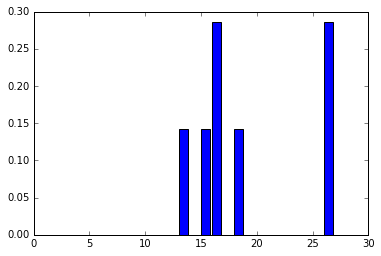

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.14285715,  0.        ,
        0.14285715,  0.2857143 ,  0.        ,  0.14285715,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.2857143 ], dtype=float32)

In [21]:
from matplotlib import pyplot
%matplotlib inline
pyplot.bar(range(len(bst.feature_importances_)), bst.feature_importances_)
pyplot.show()
bst.feature_importances_

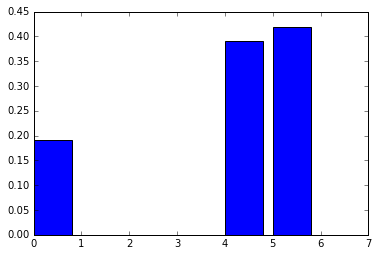

array([ 0.19047619,  0.        ,  0.        ,  0.        ,  0.3904762 ,
        0.41904762,  0.        ], dtype=float32)

In [22]:

pyplot.bar(range(len(bstP.feature_importances_)), bstP.feature_importances_)
pyplot.show()
bstP.feature_importances_

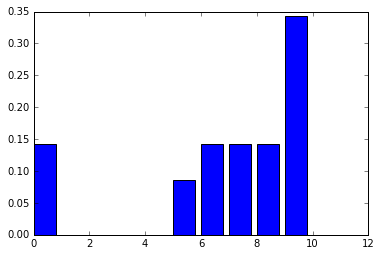

array([ 0.14285715,  0.        ,  0.        ,  0.        ,  0.        ,
        0.08571429,  0.14285715,  0.14285715,  0.14285715,  0.34285715,  0.        ], dtype=float32)

In [23]:

pyplot.bar(range(len(bstE.feature_importances_)), bstE.feature_importances_)
pyplot.show()
bstE.feature_importances_

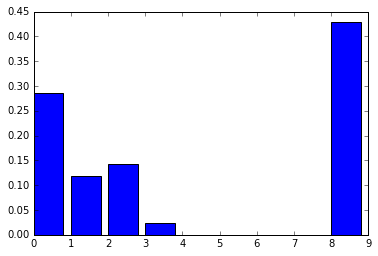

array([ 0.2857143 ,  0.11904762,  0.14285715,  0.02380952,  0.        ,
        0.        ,  0.        ,  0.        ,  0.42857143], dtype=float32)

In [24]:

pyplot.bar(range(len(bstV.feature_importances_)), bstV.feature_importances_)
pyplot.show()
bstV.feature_importances_

In [25]:
correct1 = 0

for i in range(len(preds)):
    if (y_test[i] == preds[i]):
        correct1 += 1
        
acc1 = accuracy_score(y_test, preds)

print('Predicted correctly: {0}/{1}'.format(correct1, len(preds)))
print(acc1)

Predicted correctly: 106565/120840
0.881868586561


In [26]:
correct1 = 0

for i in range(len(predsP)):
    if (y_testP[i] == predsP[i]):
        correct1 += 1
        
acc1 = accuracy_score(y_testP, predsP)

print('Predicted correctly: {0}/{1}'.format(correct1, len(predsP)))
print(acc1)

Predicted correctly: 79193/120840
0.655354187355


In [27]:
correct1 = 0

for i in range(len(predsE)):
    if (y_testE[i] == predsE[i]):
        correct1 += 1
        
acc1 = accuracy_score(y_testE, predsE)

print('Predicted correctly: {0}/{1}'.format(correct1, len(predsE)))
print(acc1)

Predicted correctly: 85861/120840
0.710534591195


In [28]:
correct2 = 0

for i in range(len(predsV)):
    if (y_testV[i] == predsV[i]):
        correct2 += 1
        
acc2 = accuracy_score(y_testV, predsV)

print('Predicted correctly: {0}/{1}'.format(correct2, len(predsV)))
print(acc2)

Predicted correctly: 84035/120840
0.695423700761


In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
confmatrix1=confusion_matrix(y_test, preds)
confmatrixP=confusion_matrix(y_testP, predsP)
confmatrixE=confusion_matrix(y_testE, predsE)
confmatrixV=confusion_matrix(y_testV, predsV)

In [31]:
def specandsens(a):
    sens=a[1][1]/(a[1][1]+a[1][0])
    spec=a[0][0]/(a[0][0]+a[0][1])
    return spec,sens

In [32]:
spec1,sens1=specandsens(confmatrix1)
print(spec1,sens1)# specificity and sensitivity

0.527077622518 0.998592261839


In [33]:
specP,sensP=specandsens(confmatrixP)
print(specP,sensP)# specificity and sensitivity

0.106705890219 0.835855530871


In [34]:
specE,sensE=specandsens(confmatrixE)
print(specE,sensE)# specificity and sensitivity

0.608043056763 0.744253568836


In [35]:
specV,sensV=specandsens(confmatrixV)
print(specV,sensV)# specificity and sensitivity

0.144681420071 0.876613949805


In [36]:
from sklearn.metrics import roc_auc_score

In [37]:
roc_auc_score(y_test,bst.predict_proba(X_test)[:,1])

0.77640274062464254

In [ ]:
roc_auc_score(y_testE,bst.predict_proba(X_testP)[:,1])

In [ ]:
roc_auc_score(y_testE,bst.predict_proba(X_testE)[:,1])

In [ ]:
roc_auc_score(y_testV,bst.predict_proba(X_testV)[:,1])